# **Data Cleaning & Preprocessing**

## Objectives

- Drop irrelevant columns
- Handle categorical variables
- Prepare features for modeling

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\Credit_Card_Customer_Churn_Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\Credit_Card_Customer_Churn_Analysis'

# Section 1

Section 1 content

In [15]:
# ------------------------------
# 1. Import Libraries & Load Data
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/BankChurners.csv'
df = pd.read_csv(file_path)

In [16]:
# Preview
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 2. Drop Irrelevant or Redundant Columns

We'll remove the columns below as they have no predictive value: 
- CLIENTNUM` 
- Naive_Bayes_Classifier 

In [17]:
# Drop ID column and NB classifier artifacts

drop_cols = ['CLIENTNUM'] + [col for col in df.columns if "Naive_Bayes" in col]
df.drop(columns=drop_cols, inplace=True)

print(f" Dropped {len(drop_cols)} irrelevant columns.")

 Dropped 3 irrelevant columns.


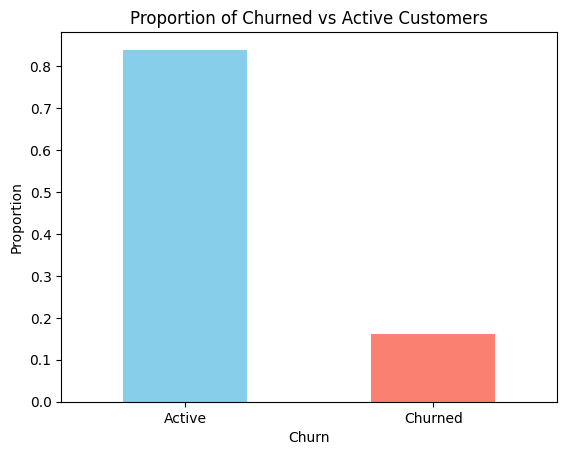

In [ ]:
# Check balance
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Proportion of Churned vs Active Customers")
plt.xticks(ticks=[0, 1], labels=["Active", "Churned"], rotation=0)
plt.ylabel("Proportion")
plt.show()

## 4. Encode Categorical Variables

The following categorical variables are encoded using one-hot encoding:
- Gender
- Education_Level
- Marital_Status
- Income_Category
- Card_Category

In [25]:
# List of categorical columns
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# One-hot encode (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")


Shape after encoding: (10127, 33)


## 5. Feature Engineering

Create a new feature to capture "spend efficiency":

In [26]:
# Avoid divide-by-zero
df_encoded['Total_Trans_Amt_per_Transaction'] = df_encoded['Total_Trans_Amt'] / df_encoded['Total_Trans_Ct'].replace(0, np.nan)

# Fill infinite or NaN with 0
df_encoded['Total_Trans_Amt_per_Transaction'] = df_encoded['Total_Trans_Amt_per_Transaction'].fillna(0)

## 6. Correlation Heatmap

Below is an inspection of correlations among numerical variables and Churn.


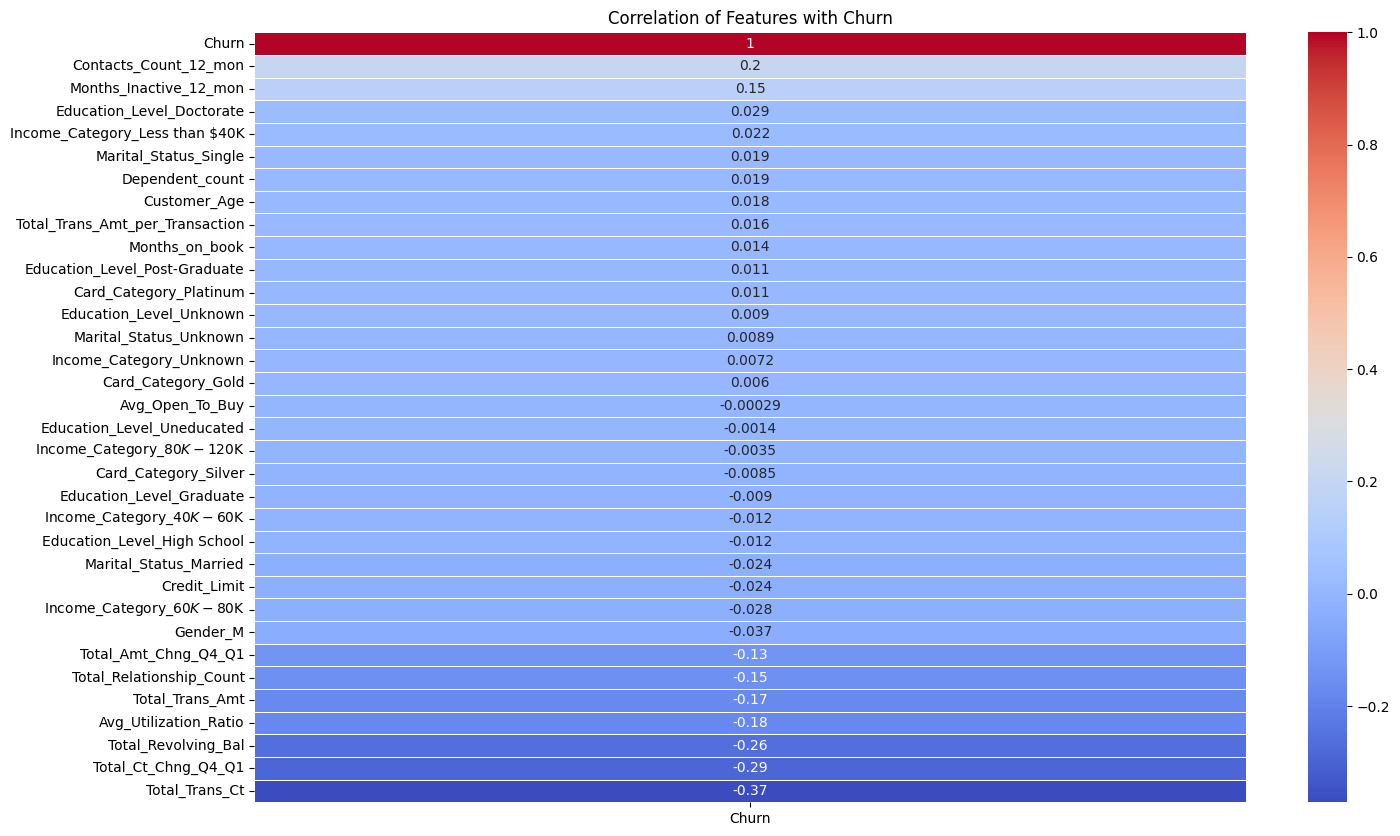

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(16, 10))
corr = df_encoded.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Churn")
plt.show()

# Feature Engineering 
# Example: Spend_Efficiency = Total_Amt_Chng_Q4_Q1 / (Total_Trans_Amt_per_Transaction + 1) to avoid divide by zero
df_encoded['Spend_Efficiency'] = df_encoded['Total_Amt_Chng_Q4_Q1'] / (df_encoded['Total_Trans_Amt_per_Transaction'] + 1) #code refined using Copilot

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
